In [1]:
import numpy as np 
import pandas as pd

standard=pd.read_excel('standard.xlsx',header=1)
standard=standard.rename(columns={"대기온도" : "외부 대기온도", "대기온도.1" : "최대 대기온도", "대기온도.2" : "최소 대기온도",
                   "온도" : "이슬점 온도", "온도1" : "노면온도1", "온도2" : "노면온도2", "요약" : "시편상태 요약"})
standard=standard.iloc[:,[3,6,7,8,18,35,43,44,45]]

standard = standard.replace("---", np.nan)
standard=standard.replace("확인불가",np.nan)
standard=standard.dropna(axis=0)

standard.reset_index(drop=True)

,외부 대기온도,상대습도,이슬점 온도,풍속,강우량,노면온도1,시편상태,시편상태 요약,날씨
0,-6.4,56,-13.7,0.4,0.0,-8.9,눈,결빙,눈
1,-6.4,57,-13.5,0.4,0.0,-8.9,눈,결빙,눈
2,-6.4,59,-13.1,0.4,0.0,-8.9,눈,결빙,눈
3,-6.4,62,-12.5,0.4,0.0,-8.9,눈,결빙,눈
4,-6.4,64,-12.1,0.4,0.0,-8.9,눈,결빙,눈
...,...,...,...,...,...,...,...,...,...
18689,8.6,92,7.3,2.2,0.0,8.3,습윤,비결빙,비
18690,8.6,93,7.5,3.6,0.0,8.3,습윤,비결빙,비
18691,8.6,93,7.5,2.2,0.0,8.3,습윤,비결빙,비
18692,8.6,93,7.5,2.2,0.0,8.3,습윤,비결빙,비


In [2]:
temp=standard.drop(labels=['날씨','시편상태'],axis=1)
temp.replace('결빙',1,inplace=True)
temp.replace('비결빙',0,inplace=True)
X=temp.iloc[:,:-1];y=temp.iloc[:,-1]

freeze_input=X.to_numpy()
freeze_target=y.to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(
    freeze_input,freeze_target,stratify=freeze_target,random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [88]:


print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9932239657631954
0.9910141206675225


In [89]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9932239657631954
0.9910141206675225


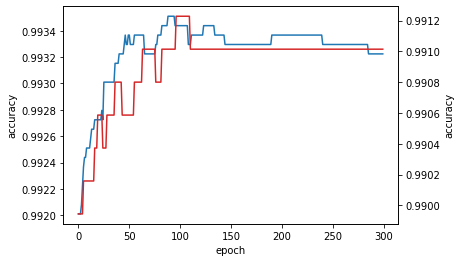

In [7]:
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=100,random_state=42)
sc.fit(train_scaled,train_target)

train_score=[]
test_score=[]
classes=np.unique(train_target)

for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

import matplotlib.pyplot as plt

fig,ax1=plt.subplots()
color_1='tab:blue'
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.plot(train_score,color=color_1)

ax2=ax1.twinx()
color_2='tab:red'
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.plot(test_score,color=color_2)

plt.show()

In [13]:
from sklearn import metrics
test_score=np.array(test_score)

array([0.98994437, 0.98994437, 0.98994437, 0.98994437, 0.98994437,
       0.99015832, 0.99015832, 0.99015832, 0.99015832, 0.99015832,
       0.99015832, 0.99015832, 0.99015832, 0.99015832, 0.99015832,
       0.99015832, 0.99037227, 0.99037227, 0.99037227, 0.99058622,
       0.99058622, 0.99058622, 0.99058622, 0.99058622, 0.99037227,
       0.99037227, 0.99037227, 0.99037227, 0.99058622, 0.99058622,
       0.99058622, 0.99058622, 0.99058622, 0.99058622, 0.99058622,
       0.99058622, 0.99080017, 0.99080017, 0.99080017, 0.99080017,
       0.99080017, 0.99080017, 0.99080017, 0.99058622, 0.99058622,
       0.99058622, 0.99058622, 0.99058622, 0.99058622, 0.99058622,
       0.99058622, 0.99058622, 0.99058622, 0.99058622, 0.99058622,
       0.99080017, 0.99080017, 0.99080017, 0.99080017, 0.99080017,
       0.99080017, 0.99080017, 0.99080017, 0.99101412, 0.99101412,
       0.99101412, 0.99101412, 0.99101412, 0.99101412, 0.99101412,
       0.99101412, 0.99101412, 0.99101412, 0.99101412, 0.99101

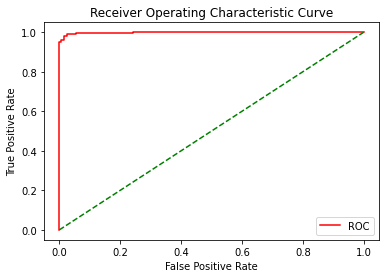

In [20]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
prob=sc.predict_proba(test_scaled)
prob=prob[:,1]
fper,tper,thresholds=metrics.roc_curve(test_target,prob)
plot_roc_curve(fper,tper)

(4674,)

(300,)